# Modelado Estocástico
## Clase 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


### Ejercicio 2

In [ ]:
df = pd.read_excel('MIA103_Ejer_3_Datos.xlsx')[['Date','IBM_price','S&P500_index','3mTB (RF) anualizada']]
df.columns = ['Date', 'IBM','SP500','3mTB']
df.head()

,Date,IBM,SP500,3mTB
0,2019-05-01,95.365471,2752.060059,2.293
1,2019-06-01,104.788651,2941.760010,2.035
2,2019-07-01,112.645882,2980.379883,2.030
3,2019-08-01,102.987724,2926.459961,1.933
4,2019-09-01,111.805038,2976.739990,1.770


In [ ]:
df['R_IBM'] = df['IBM'].pct_change()
df['R_SP'] = df['SP500'].pct_change()
df['Rf'] = (1+df['3mTB']/100)**(1/12)-1
df['Ribm-Rf'] = df['R_IBM']- df['Rf']
df['Rsp-Rf'] = df['R_SP'] - df['Rf']
df = df.dropna()
df.head()

,Date,IBM,SP500,3mTB,R_IBM,R_SP,Rf,Ribm-Rf,Rsp-Rf
1,2019-06-01,104.788651,2941.760010,2.035,0.098811,0.068930,0.001680,0.097131,0.067250
2,2019-07-01,112.645882,2980.379883,2.030,0.074982,0.013128,0.001676,0.073306,0.011452
3,2019-08-01,102.987724,2926.459961,1.933,-0.085739,-0.018092,0.001597,-0.087336,-0.019688
4,2019-09-01,111.805038,2976.739990,1.770,0.085615,0.017181,0.001463,0.084152,0.015718
5,2019-10-01,102.817261,3037.560059,1.498,-0.080388,0.020432,0.001240,-0.081628,0.019192


In [ ]:
X = sm.add_constant(df['Rsp-Rf'])
y = df['Ribm-Rf']

# Ajustar modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                Ribm-Rf   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     21.82
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.87e-05
Time:                        20:53:31   Log-Likelihood:                 83.451
No. Observations:                  59   AIC:                            -162.9
Df Residuals:                      57   BIC:                            -158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.008      0.394      0.6

### Ejercicio 3

In [ ]:
df3 = pd.read_excel('MIA103_Ejer_3_Datos.xlsx', sheet_name=2)
df3.columns=['Ganancias','Comp_CEO']
df3.head()

,Ganancias,Comp_CEO
0,357.0,0.7
1,48.0,0.7
2,932.0,0.8
3,366.0,0.7
4,83.0,0.8


In [ ]:
X = sm.add_constant(df3['Ganancias'])
y = df3['Comp_CEO']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               Comp_CEO   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     52.24
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           5.50e-10
Time:                        20:53:31   Log-Likelihood:                -73.655
No. Observations:                  70   AIC:                             151.3
Df Residuals:                      68   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6000      0.112      5.342      0.0

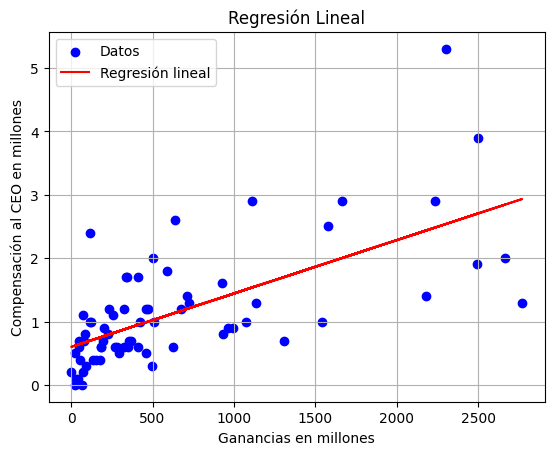

In [ ]:
predicts = modelo.predict(X)
plt.scatter(df3['Ganancias'], y, label = 'Datos', color='blue')
plt.plot(df3['Ganancias'], predicts, color='red', label='Regresión lineal')
plt.xlabel('Ganancias en millones')
plt.ylabel('Compensación al CEO en millones')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
se_beta = modelo.bse['Ganancias']
beta_hat = modelo.params['Ganancias']
n = modelo.nobs
k = len(modelo.params)
df = n - k

In [ ]:
t_stat = beta_hat / se_beta

# Nivel de significancia
alpha = 0.01

# Valor crítico para test a dos colas
t_crit = stats.t.ppf(1 - alpha/2, df)

print(f'Estadístico t calculado: {t_stat:.4f}')
print(f'Valor crítico t para alpha={alpha}: ±{t_crit:.4f}')



Estadístico t calculado: 7.2279
Valor crítico t para alpha=0.01: ±2.6501
